In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load Dataset

In [2]:
data = pd.read_csv("iris.csv")
data.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
9,10,4.9,3.1,1.5,0.1,Iris-setosa
61,62,5.9,3.0,4.2,1.5,Iris-versicolor
149,150,5.9,3.0,5.1,1.8,Iris-virginica
98,99,5.1,2.5,3.0,1.1,Iris-versicolor
46,47,5.1,3.8,1.6,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
55,56,5.7,2.8,4.5,1.3,Iris-versicolor
94,95,5.6,2.7,4.2,1.3,Iris-versicolor
36,37,5.5,3.5,1.3,0.2,Iris-setosa
75,76,6.6,3.0,4.4,1.4,Iris-versicolor


In [3]:
data.shape

(150, 6)

In [4]:
data.info() 

# no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
data.duplicated().sum() # no duplicates

0

In [6]:
df = data.drop(["Id"],axis = 1) #dropping id column because it is unique
# filtered_df = df

<Axes: >

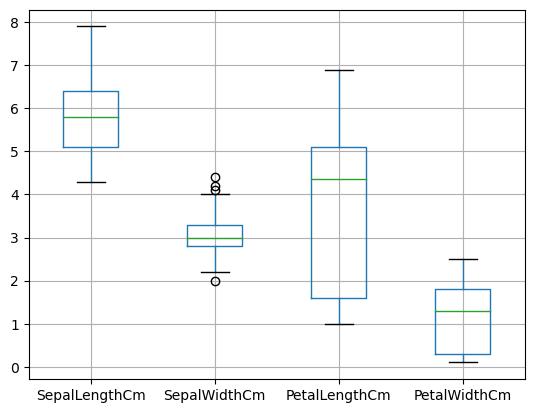

In [7]:
df.boxplot()  # SepalWidth column has outliers

In [10]:
# removing of outliers from SepalWidthCm columns using IQR

Q1 = df['SepalWidthCm'].quantile(0.25)
Q3 = df['SepalWidthCm'].quantile(0.75)
IQR = Q3 - Q1
 
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered_df = df[(df['SepalWidthCm'] >= lower_bound) & (df['SepalWidthCm'] <= upper_bound)]
filtered_df.shape

(146, 5)

In [11]:
filtered_df.value_counts(["Species"]) 

Species        
Iris-virginica     50
Iris-versicolor    49
Iris-setosa        47
dtype: int64

In [12]:
filtered_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Model Training

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [14]:
X = filtered_df.drop('Species', axis=1) # dropping Species column for training data
y = filtered_df['Species']

In [15]:
# Split the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(116, 4)
(30, 4)
(116,)
(30,)


In [16]:
cls_model = LogisticRegression()

In [17]:
cls_model.fit(X_train, y_train)

LogisticRegression()

In [18]:
y_pred = cls_model.predict(X_test)

In [19]:
accuracy_score(y_test, y_pred)

0.9333333333333333

In [20]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.88      0.88      0.88         8
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.92      0.92      0.92        30
   weighted avg       0.93      0.93      0.93        30

